In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('summary_data.csv')

In [3]:
pd.set_option('max_columns', None)

In [4]:
data.head()

,file,line,start,end,speaker,speaker_role,word_count,duration,text,start_idx,end_idx,gs_score,pitch_log_diff_variance,pitch_log_mean,pitch_log_stdev,pitch_log_2pct,pitch_log_25pct,pitch_log_50pct,pitch_log_75pct,pitch_log_98pct,onset_count,onset_str_mean,onset_str_stddev,onset_str_entropy,onset_time_diff_mean,onset_time_diff_stddev,onset_time_diff_entropy,word_rate,onset_rate,year,justice_word_count_mean,justice_word_count_std,justice_duration_mean,justice_duration_std,justice_gs_score_mean,justice_gs_score_std,justice_pitch_log_diff_variance_mean,justice_pitch_log_diff_variance_std,justice_pitch_log_mean_mean,justice_pitch_log_mean_std,justice_pitch_log_stdev_mean,justice_pitch_log_stdev_std,justice_pitch_log_2pct_mean,justice_pitch_log_2pct_std,justice_pitch_log_25pct_mean,justice_pitch_log_25pct_std,justice_pitch_log_50pct_mean,justice_pitch_log_50pct_std,justice_pitch_log_75pct_mean,justice_pitch_log_75pct_std,justice_pitch_log_98pct_mean,justice_pitch_log_98pct_std,justice_onset_count_mean,justice_onset_count_std,justice_onset_str_mean_mean,justice_onset_str_mean_std,justice_onset_str_stddev_mean,justice_onset_str_stddev_std,justice_onset_str_entropy_mean,justice_onset_str_entropy_std,justice_onset_time_diff_mean_mean,justice_onset_time_diff_mean_std,justice_onset_time_diff_stddev_mean,justice_onset_time_diff_stddev_std,justice_onset_time_diff_entropy_mean,justice_onset_time_diff_entropy_std,justice_word_rate_mean,justice_word_rate_std,justice_onset_rate_mean,justice_onset_rate_std,justice_year_word_count_mean,justice_year_word_count_std,justice_year_duration_mean,justice_year_duration_std,justice_year_gs_score_mean,justice_year_gs_score_std,justice_year_pitch_log_diff_variance_mean,justice_year_pitch_log_diff_variance_std,justice_year_pitch_log_mean_mean,justice_year_pitch_log_mean_std,justice_year_pitch_log_stdev_mean,justice_year_pitch_log_stdev_std,justice_year_pitch_log_2pct_mean,justice_year_pitch_log_2pct_std,justice_year_pitch_log_25pct_mean,justice_year_pitch_log_25pct_std,justice_year_pitch_log_50pct_mean,justice_year_pitch_log_50pct_std,justice_year_pitch_log_75pct_mean,justice_year_pitch_log_75pct_std,justice_year_pitch_log_98pct_mean,justice_year_pitch_log_98pct_std,justice_year_onset_count_mean,justice_year_onset_count_std,justice_year_onset_str_mean_mean,justice_year_onset_str_mean_std,justice_year_onset_str_stddev_mean,justice_year_onset_str_stddev_std,justice_year_onset_str_entropy_mean,justice_year_onset_str_entropy_std,justice_year_onset_time_diff_mean_mean,justice_year_onset_time_diff_mean_std,justice_year_onset_time_diff_stddev_mean,justice_year_onset_time_diff_stddev_std,justice_year_onset_time_diff_entropy_mean,justice_year_onset_time_diff_entropy_std,justice_year_word_rate_mean,justice_year_word_rate_std,justice_year_onset_rate_mean,justice_year_onset_rate_std
0,11-681,4,62.906,82.218,Ruth_Bader_Ginsburg,scotus_justice,45,19.312,But how does it differ from the typical bargai...,1006496,1315488,-1.173626,4.420750,5.279096,3.690280,0.0,0.000000,7.710526,7.864693,8.272526,116.0,0.784787,1.376932,-3.093341,0.227200,0.214818,-79.000485,2.330157,6.006628,2013.0,65.111683,23.936758,30.546159,12.900663,-0.120233,0.619828,4.332276,0.771608,4.374778,0.845197,3.732496,0.182046,0.0,0.0,0.204550,1.208909,5.598532,3.247815,7.666009,0.706801,8.215027,0.137034,171.511389,61.861765,0.682518,0.075204,1.139276,0.156244,-3.898827,1.008391,0.238596,0.049807,0.256829,0.069155,-63.762414,36.458768,2.200660,0.373876,5.771207,0.902757,68.093496,23.457547,32.766317,12.892902,-0.195107,0.624182,4.312981,0.726183,4.787263,0.597654,3.698301,0.180863,0.0,0.0,0.301190,1.466223,7.070379,1.639869,7.784569,0.138150,8.266880,0.125538,186.662602,66.358980,0.701429,0.065423,1.160205,0.122135,-3.589175,0.825202,0.238431,0.043301,0.251816,0.063445,-62.786753,38.406475,2.141787,0.350414,5.837687,0.860461
1,11-681,6,99.497,119.410,Sonia_Sotomayor,scotus_justice,40,19.913,Is your argument dependent on this being sort ...,1591952,1910560,-0

In [5]:
df = data.copy()

In [6]:
df.columns

Index(['file', 'line', 'start', 'end', 'speaker', 'speaker_role', 'word_count',
       'duration', 'text', 'start_idx',
       ...
       'justice_year_onset_time_diff_mean_mean',
       'justice_year_onset_time_diff_mean_std',
       'justice_year_onset_time_diff_stddev_mean',
       'justice_year_onset_time_diff_stddev_std',
       'justice_year_onset_time_diff_entropy_mean',
       'justice_year_onset_time_diff_entropy_std',
       'justice_year_word_rate_mean', 'justice_year_word_rate_std',
       'justice_year_onset_rate_mean', 'justice_year_onset_rate_std'],
      dtype='object', length=110)

In [7]:
df.drop(['file', 'line', 'start', 'end', 'speaker', 'speaker_role', 'text', 
         'start_idx','end_idx'], axis=1, inplace=True)





In [8]:
#set half of score as grandstanding for now to keep balanced data

df['Grandstanding_ind'] = np.where(df['gs_score']>data['gs_score'].mean(),1,0)


In [9]:
df.drop('gs_score', axis=1, inplace=True)

In [10]:
df = df.dropna()

In [11]:
X = df.loc[:, df.columns != 'Grandstanding_ind']
y = df.loc[:, df.columns == 'Grandstanding_ind']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)


In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=0.2, random_state=117)

In [15]:
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
# Create KNN instance
# n_neighbors -> argument identifies the amount of neighbors used to ID classification
knn = KNeighborsClassifier(n_neighbors=1)
# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [16]:
# Use the .predict() method to make predictions from the X_test subset
pred = knn.predict(X_test)
# Review the predictions
pred

array([1, 0, 1, ..., 1, 1, 0])

In [17]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1546
           1       0.63      0.61      0.62      1867

    accuracy                           0.59      3413
   macro avg       0.59      0.59      0.59      3413
weighted avg       0.60      0.59      0.60      3413



In [19]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 888
FP - False Positive 658
FN - False Negative 725
TP - True Positive 1142
Accuracy Rate: 0.5947846469381776
Misclassification Rate: 0.40521535306182244


In [21]:
# Generate function to add error rates of KNN with various k-values
# error_rate -> empty list to gather error rates at various k-values
# for loop -> loops through k values 1 to 39
# knn -> creates instance of KNeighborsClassifier with various k
# knn.fit -> trains the model
# pred_i -> conducts predictions from model on test subset
# error_rate.append -> adds error rate of model with various k-value, using the average where prediction not
# equal to the test values
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_i=pred_i.reshape(3413,1)
    error_rate.append(np.mean(pred_i != y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Text(0, 0.5, 'Error Rate')

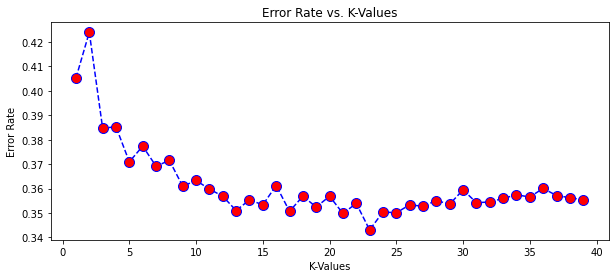

In [22]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [23]:
# Retrain model using optimal k-value
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [24]:
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1546
           1       0.68      0.67      0.68      1867

    accuracy                           0.65      3413
   macro avg       0.65      0.65      0.65      3413
weighted avg       0.65      0.65      0.65      3413

